In [165]:
import sys, traceback
from plantcv import plantcv as pcv
import numpy as np
import glob
import os

In [166]:
def main():
    # Get options
    args = options()

    # Read image
    img, path, filename = pcv.readimage(filename=args.image)

    pcv.params.debug=args.debug #set debug mode

In [167]:
pcv.params.debug = "plot"
import os
os.getcwd()
os.chdir("/Users/magda/Documents/PlantCV/Aparna_Tepary_20220305/")
outdir = '/Users/magda/Documents/PlantCV/Aparna_Tepary_20220305/processed/'
image_list = glob.glob('*.jpg')
my_picture = image_list[30]
my_picture

'2022.03.05-14.33.12.RaspiY_side1_cameraA.jpg'

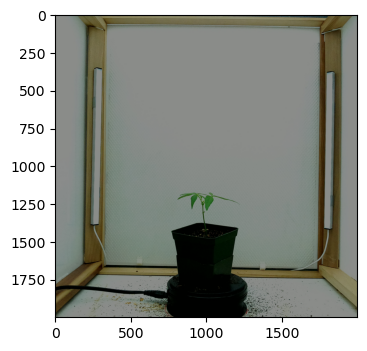

In [168]:
#read in image
img, path, img_filename = pcv.readimage(filename=my_picture, mode="native")

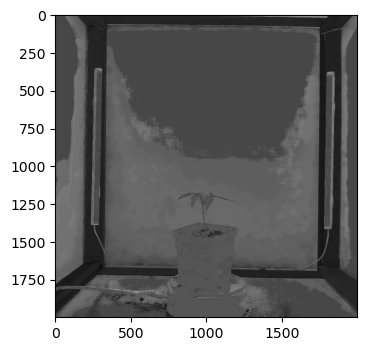

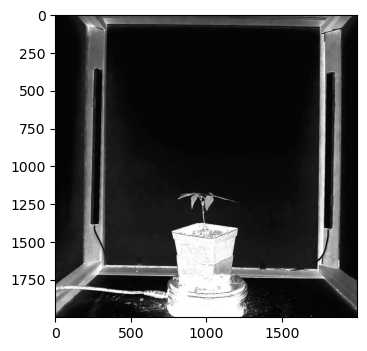

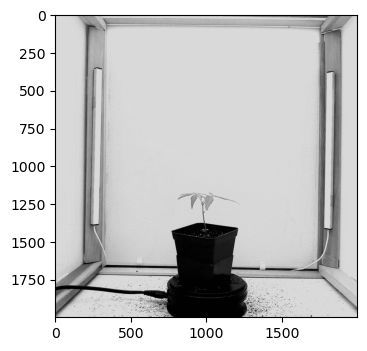

In [169]:
h = pcv.rgb2gray_hsv(rgb_img=img, channel='h')
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
v = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

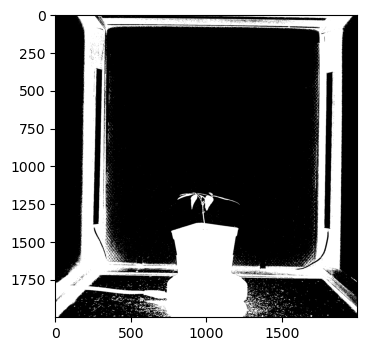

In [170]:
v_thresh = pcv.threshold.binary(gray_img=v, threshold=122, max_value=np.max(v), object_type='dark')

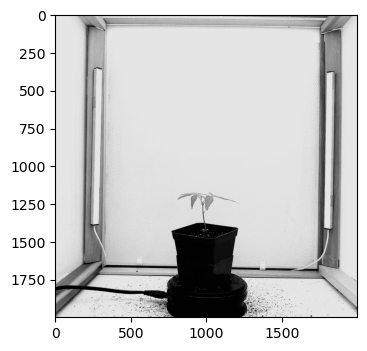

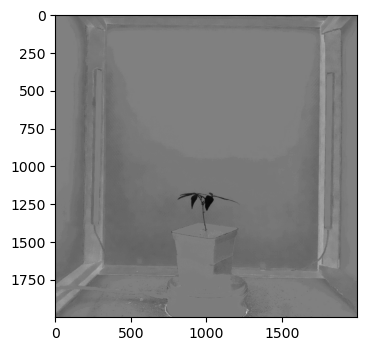

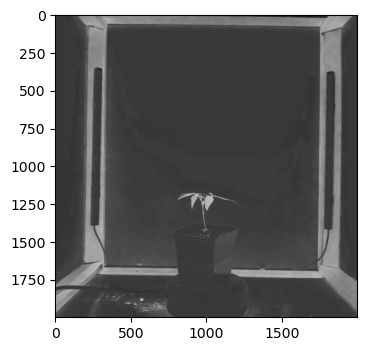

In [171]:
l = pcv.rgb2gray_lab(rgb_img=img, channel='l')
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

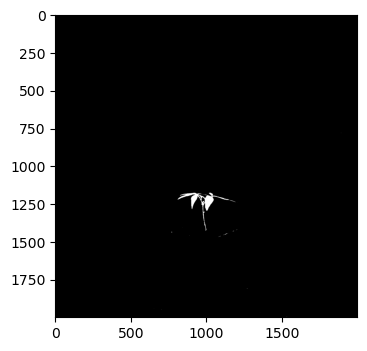

In [172]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=110, max_value=np.max(a), object_type='dark')

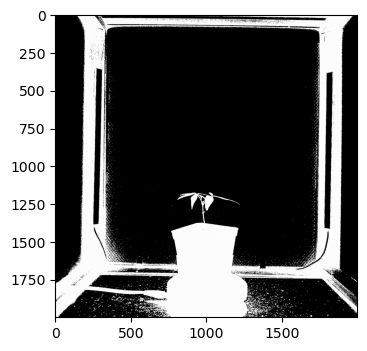

In [173]:
v_a = pcv.logical_or(a_thresh, v_thresh)

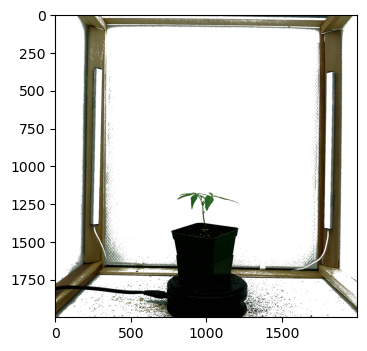

In [174]:
masked = pcv.apply_mask(img=img, mask=v_a, mask_color="white")

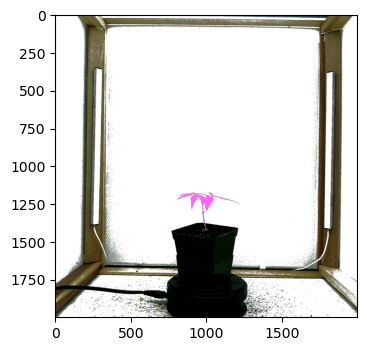

In [175]:
id_objects, obj_hierarchy = pcv.find_objects(img=masked, mask=a_thresh)

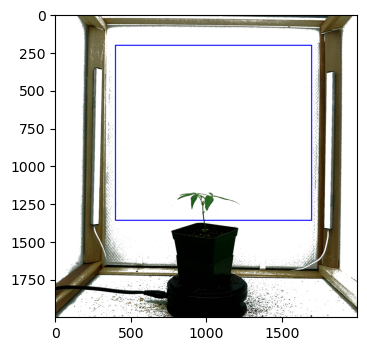

In [176]:
roi1, roi_hierarchy = pcv.roi.rectangle(img= masked, x=400, y=200 , h=1160 , w=1300)

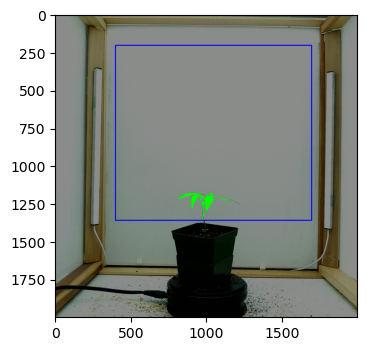

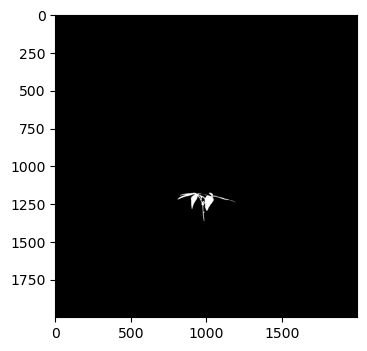

In [177]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img = img, roi_contour=roi1,
                                                              roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects,
                                                              obj_hierarchy= obj_hierarchy,
                                                              roi_type="partial")

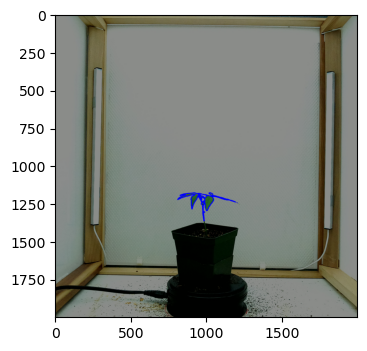

In [178]:
obj, mask = pcv.object_composition(img=img, contours=roi_objects, 
                                  hierarchy= hierarchy3)

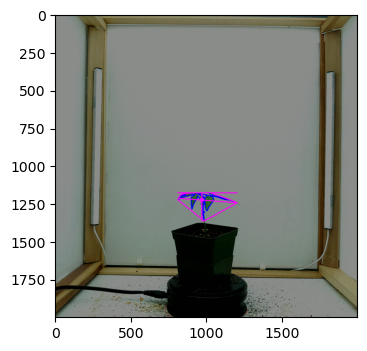

In [179]:
analysis_image = pcv.analyze_object(img=img, obj=obj, mask=mask)